final result

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fertilizer_data_path = 'FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [3]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [5]:
del merge_fert['Unnamed: 0']

In [6]:
merge_fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [7]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

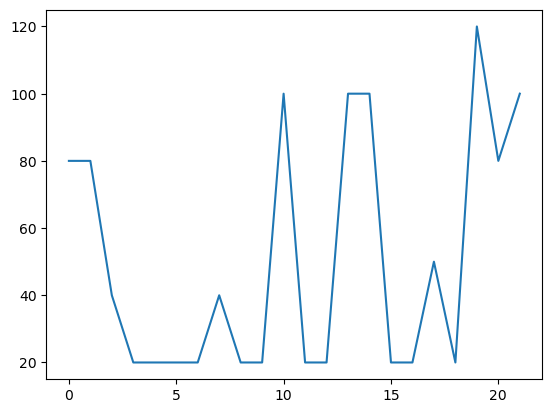

In [8]:
plt.plot(merge_fert["N"])

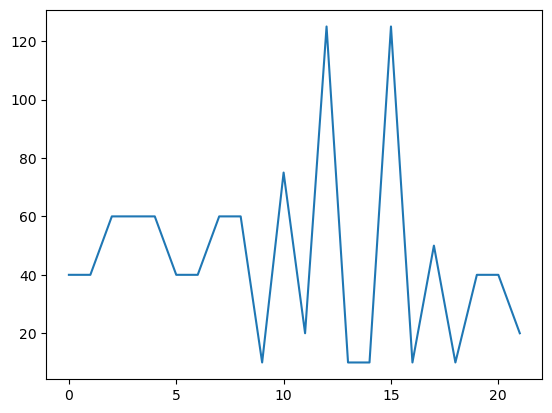

In [9]:
plt.plot(merge_fert["P"])


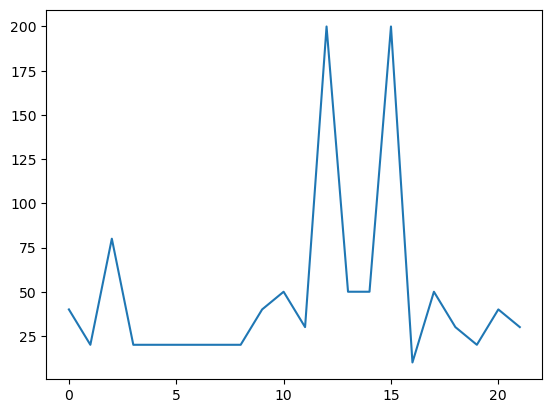

In [10]:
plt.plot(merge_fert["K"])

<Axes: >

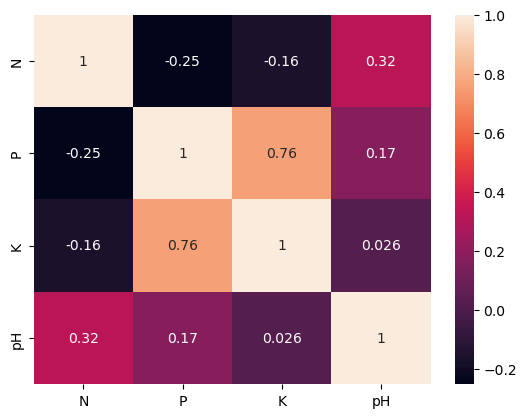

In [16]:
sns.heatmap(merge_fert.corr(),annot=True)

In [12]:
merge_crop = pd.read_csv('MergeFileCrop.csv')
reco_fert = merge_fert

In [33]:
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [34]:
temp


,N,P,K
0,76,39,39
1,83,50,42
2,83,53,35
3,91,48,43
4,98,35,36
...,...,...,...
2195,120,17,31
2196,94,26,35
2197,81,34,31
2198,111,16,25


In [35]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [36]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,76,39,39
1,1,21.770462,80.319644,7.038096,226.655537,rice,83,50,42
2,2,23.004459,82.320763,7.840207,263.964248,rice,83,53,35
3,3,26.491096,80.158363,6.980401,242.864034,rice,91,48,43
4,4,20.130175,81.604873,7.628473,262.717340,rice,98,35,36
...,...,...,...,...,...,...,...,...,...
2195,895,26.774637,66.413269,6.780064,177.774507,coffee,120,17,31
2196,896,27.417112,56.636362,6.086922,127.924610,coffee,94,26,35
2197,897,24.131797,67.225123,6.362608,173.322839,coffee,81,34,31
2198,898,26.272418,52.127394,6.758793,127.175293,coffee,111,16,25


In [37]:
del merge_crop['Unnamed: 0']

In [38]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,76,39,39
1,21.770462,80.319644,7.038096,226.655537,rice,83,50,42
2,23.004459,82.320763,7.840207,263.964248,rice,83,53,35
3,26.491096,80.158363,6.980401,242.864034,rice,91,48,43
4,20.130175,81.604873,7.628473,262.717340,rice,98,35,36
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,120,17,31
2196,27.417112,56.636362,6.086922,127.924610,coffee,94,26,35
2197,24.131797,67.225123,6.362608,173.322839,coffee,81,34,31
2198,26.272418,52.127394,6.758793,127.175293,coffee,111,16,25


In [39]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [41]:
merge_crop.to_csv("crop_recommendation.csv",index=False)

In [42]:
df = pd.read_csv('crop_recommendation.csv')

In [43]:
df.head(20)

,N,P,K,temperature,humidity,ph,rainfall,label
0,76,39,39,20.879744,82.002744,6.502985,202.935536,rice
1,83,50,42,21.770462,80.319644,7.038096,226.655537,rice
2,83,53,35,23.004459,82.320763,7.840207,263.964248,rice
3,91,48,43,26.491096,80.158363,6.980401,242.864034,rice
4,98,35,36,20.130175,81.604873,7.628473,262.717340,rice
5,63,57,39,23.058049,83.370118,7.073454,251.055000,rice
6,67,46,43,22.708838,82.639414,5.700806,271.324860,rice
7,89,38,35,20.277744,82.894086,5.718627,241.974195,rice
8,83,55,42,24.515881,83.535216,6.685346,230.446236,rice
9,96,49,41,23.223974,83.033227,6.336254,221.209196,rice
